#Perkenalan

**Anggota Kelompok**:
1. Abdillah Halim Hanafi
2. Achmad Arga Bimantara Akbar
3. Dea Rishanti

**Dataset**:
- Jumlah data : 8950
- sumber : https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/code

**Objektif**:
- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan

#Import Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, BisectingKMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Load Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/kaggle_dataset/credit-card/CC GENERAL.csv")

1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0
and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score
between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in
one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in
installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

#EDA

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.shape

(8950, 18)

Dataset ini memiliki 8950 baris dan 18 kolom.

##Visualization

###Histogram

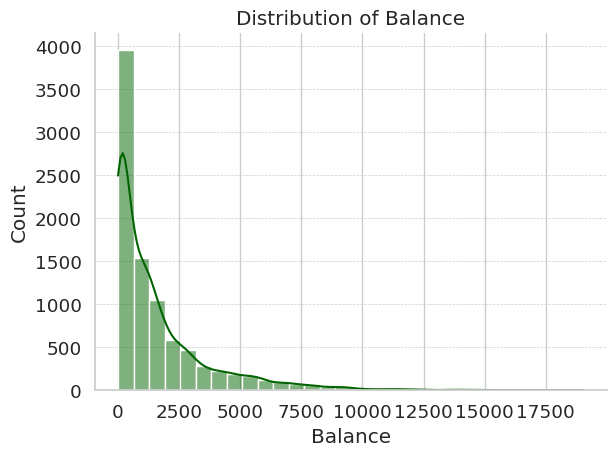

In [ ]:
sns.set(style='whitegrid', font_scale=1.2)

histplot = sns.histplot(data=df, x="BALANCE", bins=30, kde=True, color="darkgreen")

histplot.set_title('Distribution of Balance')
histplot.set_xlabel('Balance')
histplot.set_ylabel('Count')

histplot.spines['top'].set_visible(False)
histplot.spines['right'].set_visible(False)
histplot.grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Histogram tersebut merupakan distribusi dari variabel BALANCE

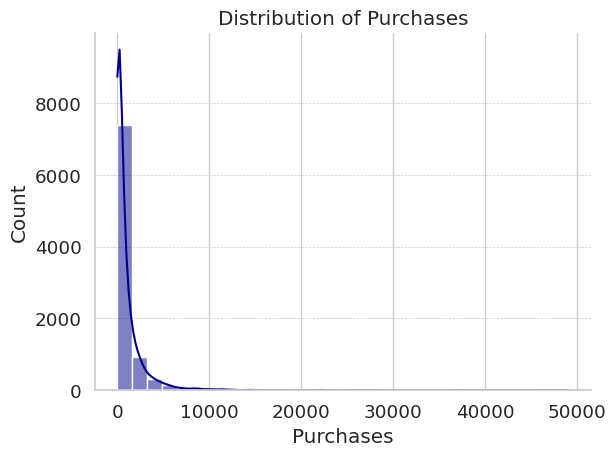

In [ ]:
sns.set(style='whitegrid', font_scale=1.2)

histplot = sns.histplot(data=df, x="PURCHASES", bins=30, kde=True, color="darkblue")

histplot.set_title('Distribution of Purchases')
histplot.set_xlabel('Purchases')
histplot.set_ylabel('Count')

histplot.spines['top'].set_visible(False)
histplot.spines['right'].set_visible(False)
histplot.grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Histogram tersebut merupakan distribusi dari variabel PURCHASES

###Scatter plot

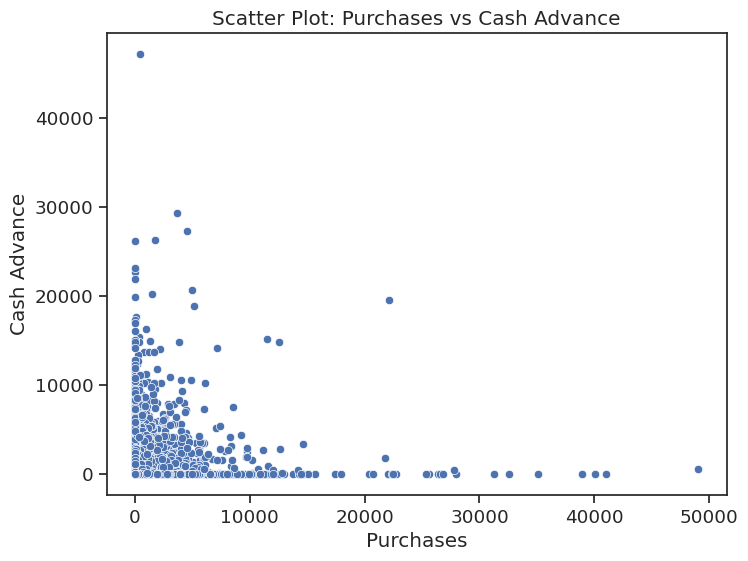

In [ ]:
numeric_columns = ['PURCHASES', 'CASH_ADVANCE']
data_subset = df[numeric_columns]

sns.set(style='ticks', font_scale=1.2)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_subset, x='PURCHASES', y='CASH_ADVANCE')

plt.title('Scatter Plot: Purchases vs Cash Advance')
plt.xlabel('Purchases')
plt.ylabel('Cash Advance')

plt.show()

Visualisasi ini membantu dalam memahami hubungan antara pembelian ('PURCHASES') dan penarikan uang tunai ('CASH_ADVANCE') dalam dataset tersebut.

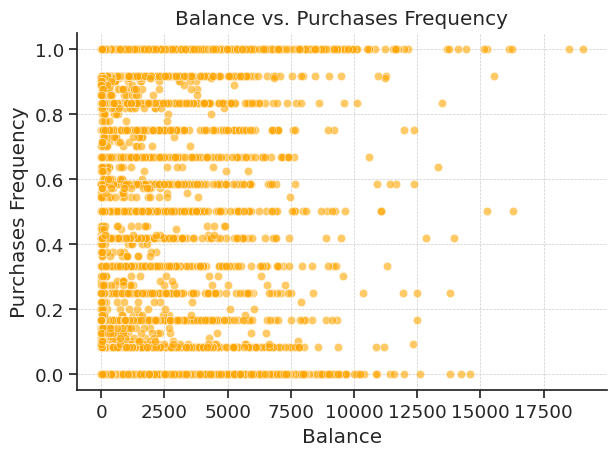

In [ ]:
sns.set(style='ticks', font_scale=1.2)

scatterplot = sns.scatterplot(data=df, x="BALANCE", y="PURCHASES_FREQUENCY", color="orange", alpha=0.6)

scatterplot.set_title('Balance vs. Purchases Frequency')
scatterplot.set_xlabel('Balance')
scatterplot.set_ylabel('Purchases Frequency')

scatterplot.spines['top'].set_visible(False)
scatterplot.spines['right'].set_visible(False)
scatterplot.grid(linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Visualisasi ini membantu dalam memahami hubungan antara pembelian ('Purchases Frequency') dan penarikan uang tunai ('BALANCE') dalam dataset tersebut.

###Pairplot

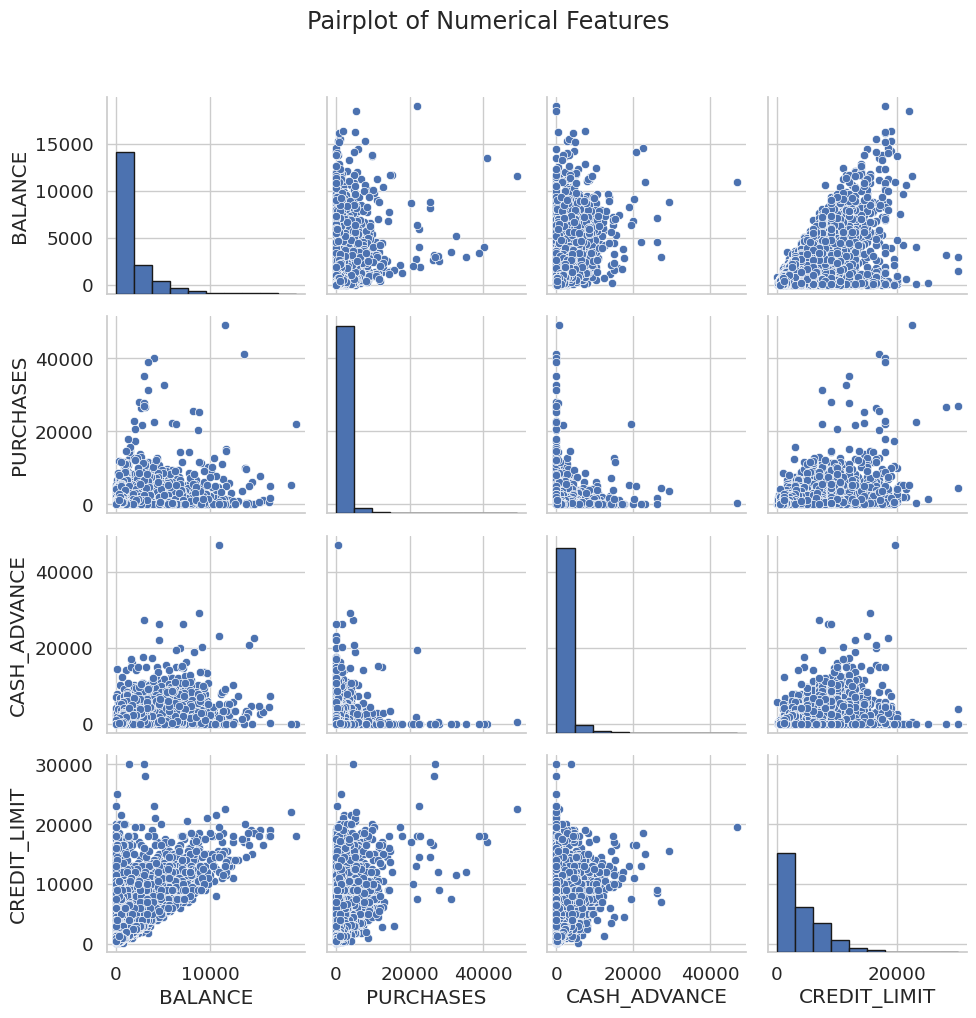

In [ ]:
selected_columns = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT']
data_subset = df[selected_columns]

sns.set(style='whitegrid', font_scale=1.2)

color_palette = sns.color_palette("Set2")
pairplot = sns.pairplot(data_subset)

pairplot.fig.suptitle('Pairplot of Numerical Features', y=1.02)
plt.tight_layout()

pairplot.map_diag(plt.hist, edgecolor='k')

plt.show()

Dengan melihat pairplot ini, kita dapat melihat pola hubungan antara variabel-variabel numerik dalam dataset tersebut.

###Barplot

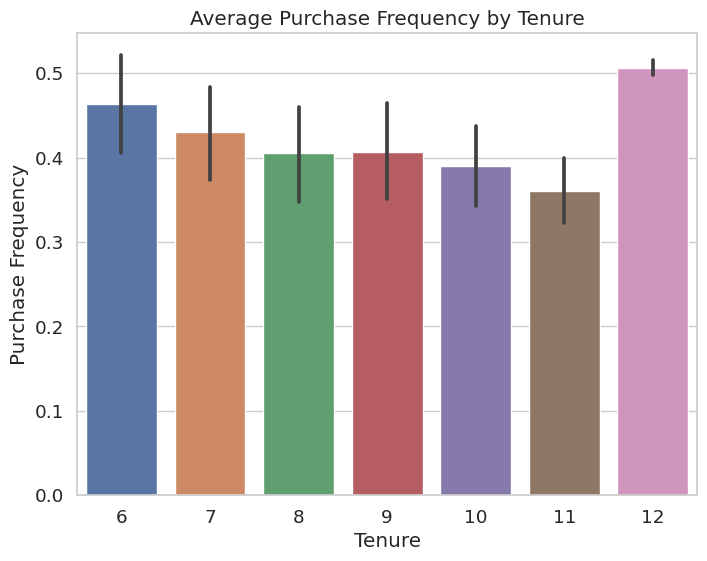

In [ ]:
sns.set(style='whitegrid', font_scale=1.2)

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x="TENURE", y="PURCHASES_FREQUENCY")

plt.title('Average Purchase Frequency by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Purchase Frequency')

plt.show()

Dengan melihat bar plot ini, kita dapat melihat perbandingan rata-rata frekuensi pembelian antara kategori-kategori tenure dalam dataset tersebut.

###Pieplot

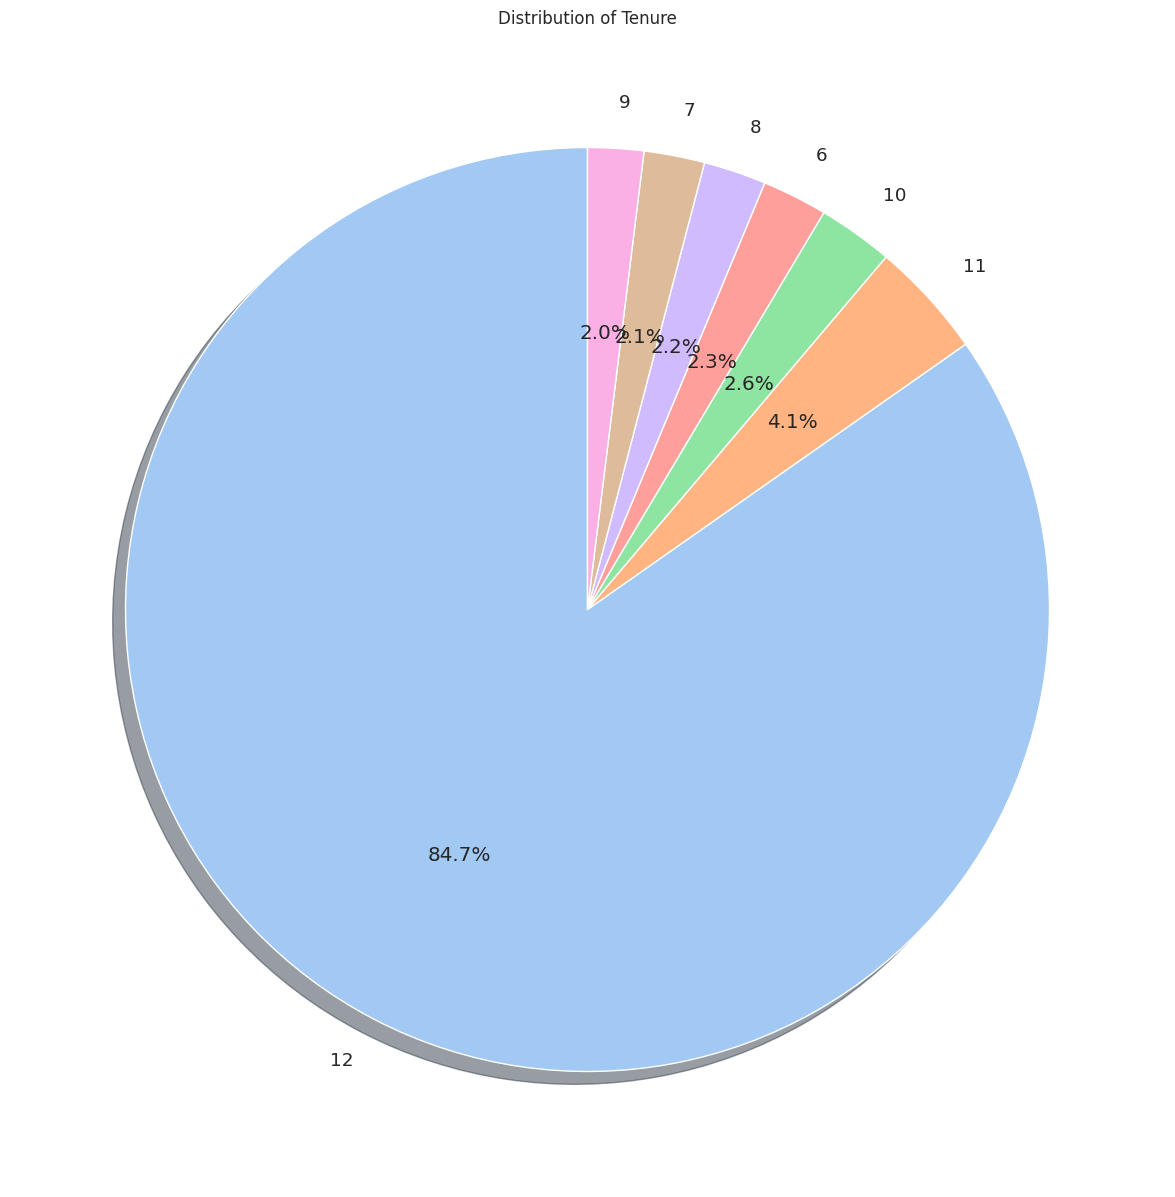

In [ ]:
tenure_counts = df['TENURE'].value_counts()

colors = sns.color_palette('pastel')[0:len(tenure_counts)]

plt.figure(figsize=(15, 15))
plt.pie(tenure_counts, labels=tenure_counts.index, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
plt.title('Distribution of Tenure', fontsize=12)

plt.setp(plt.gca().get_xticklabels(), fontsize=5)
plt.setp(plt.gca().get_yticklabels(), fontsize=5)

plt.show()

Dengan melihat pie chart ini, kita dapat melihat persentase masing-masing kategori tenure dalam dataset tersebut secara visual.

##Checking na values

In [ ]:
data_=pd.DataFrame(df.isnull().sum(),columns=['Number Of Null'])
data_['Percentage']=data_['Number Of Null']/df.shape[0]*100
data_

,Number Of Null,Percentage
CUST_ID,0,0.000000
BALANCE,0,0.000000
BALANCE_FREQUENCY,0,0.000000
PURCHASES,0,0.000000
ONEOFF_PURCHASES,0,0.000000
INSTALLMENTS_PURCHASES,0,0.000000
CASH_ADVANCE,0,0.000000
PURCHASES_FREQUENCY,0,0.000000
ONEOFF_PURCHASES_FREQUENCY,0,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.000000


- CREDIT_LIMIT: Jumlah nilai yang hilang pada variabel ini adalah 1, yang artinya ada satu data yang hilang dalam kolom ini dengan proporsi sekitar 0.011173 atau sekitar 1.1% dari total data.
- MINIMUM_PAYMENTS: Jumlah nilai yang hilang pada variabel ini adalah 313, yang berarti ada 313 data yang hilang dalam kolom ini dengan proporsi sekitar 3.497207 atau sekitar 34.97% dari total data.

###Missing Data Mechanisms

In [ ]:
dfx = df.copy()

In [ ]:
dfx['CreditLimit_null'] = np.where(dfx.CREDIT_LIMIT.isnull(), 1, 0)
dfx['minimumPayments_null'] = np.where(dfx.MINIMUM_PAYMENTS.isnull(), 1, 0)

In [ ]:
print('Value Counts')
print(dfx.groupby(['TENURE'])['CreditLimit_null'].value_counts())

print('\nMean')
print(dfx.groupby(['TENURE'])['CreditLimit_null'].mean())

Value Counts
TENURE  CreditLimit_null
6       0                    203
        1                      1
7       0                    190
8       0                    196
9       0                    175
10      0                    236
11      0                    365
12      0                   7584
Name: CreditLimit_null, dtype: int64

Mean
TENURE
6     0.004902
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
Name: CreditLimit_null, dtype: float64


dapat disimpulkan bahwa variabel credit limit Missing Not At Random(MNAR)

In [ ]:
print('Value Counts')
print(dfx.groupby(['TENURE'])['minimumPayments_null'].value_counts())

print('\nMean')
print(dfx.groupby(['TENURE'])['minimumPayments_null'].mean())

Value Counts
TENURE  minimumPayments_null
6       0                        185
        1                         19
7       0                        177
        1                         13
8       0                        183
        1                         13
9       0                        164
        1                         11
10      0                        226
        1                         10
11      0                        356
        1                          9
12      0                       7346
        1                        238
Name: minimumPayments_null, dtype: int64

Mean
TENURE
6     0.093137
7     0.068421
8     0.066327
9     0.062857
10    0.042373
11    0.024658
12    0.031382
Name: minimumPayments_null, dtype: float64


dapat disimpulkan bahwa variabel minimumPayments Missing Completly At Random (MCAR)

#Data Cleaning

In [ ]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

impute missing value menggunakan fillna

In [ ]:
df = df.drop(['CUST_ID'], axis=1)

drop variabel yang tidak dipakai

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#Create Model

Model ini dibuat dari jumlah pembelian yang ada ('PURCHASES') dengan Saldo jumlah yang tersisa untuk melakukan pembelian ('BALANCE')

In [ ]:
inertia = []
for k in range(1, 9):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df)
    inertia.append(model.inertia_)

Dalam inertia elbow method, kita mencari titik "siku" (elbow) dalam grafik nilai inersia terhadap jumlah kluster. Titik tersebut menunjukkan jumlah kluster di mana penurunan nilai inersia tidak signifikan atau berkurang secara perlahan. Titik ini dapat dianggap sebagai jumlah kluster yang optimal atau jumlah kluster yang paling baik untuk pemodelan data kita.

In [ ]:
inertia_df = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(1, 9)])
inertia_df

,Inertia
1,3.930610e+11
2,2.792966e+11
3,2.328064e+11
4,2.065547e+11
5,1.823173e+11
6,1.616909e+11
7,1.452073e+11
8,1.328759e+11


Text(0.5, 1.0, 'Elbow Method')

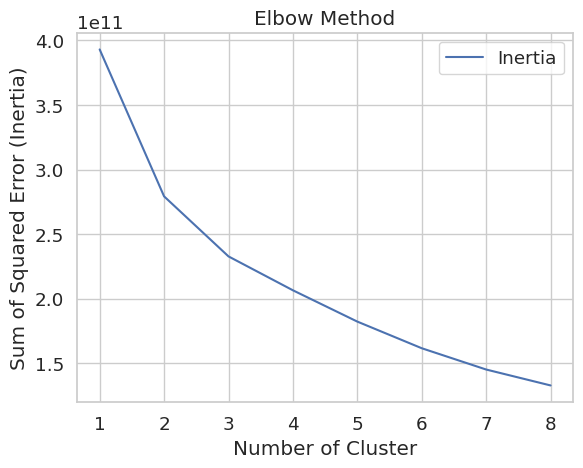

In [ ]:
inertia_df.plot(kind='line')
plt.ylabel('Sum of Squared Error (Inertia)')
plt.xlabel('Number of Cluster')
plt.title('Elbow Method')

- Pada jumlah klaster 1, menunjukkan jumlah variabilitas dalam satu kelompok tunggal. Semakin tinggi nilai inertia, semakin tinggi variabilitas dalam kelompok tunggal tersebut.

- Pada jumlah klaster 2, dengan menggunakan dua klaster, jumlah variabilitas dalam kelompok telah berkurang dibandingkan dengan satu kelompok tunggal sebelumnya.

- Pada jumlah klaster 3,  dengan menggunakan tiga klaster, jumlah variabilitas dalam kelompok telah berkurang lebih lanjut.

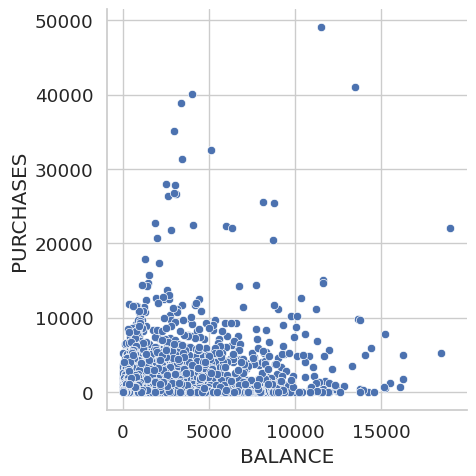

In [ ]:
sns.relplot(x='BALANCE', y='PURCHASES', data=df)

##KMeans


K-Means adalah algoritma pengelompokan (clustering) yang populer dalam machine learning. Tujuannya adalah untuk mengelompokkan titik-titik data ke dalam k kelompok berdasarkan jarak antara titik-titik tersebut. Algoritma ini bekerja dengan cara menginisialisasi pusat-pusat kelompok secara acak, kemudian mengiterasi proses pengelompokan dan pembaruan pusat kelompok hingga konvergensi. K-Means menggunakan jarak Euclidean untuk mengukur kedekatan antara titik-titik data. Hasil dari algoritma K-Means adalah pemisahan data menjadi kelompok-kelompok yang saling berdekatan berdasarkan karakteristik yang dimiliki oleh titik-titik data.

In [ ]:
modelKM = KMeans(n_clusters=2, random_state=42)
modelKM.fit(df)
df['Cluster KM'] = modelKM.predict(df)
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster KM
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


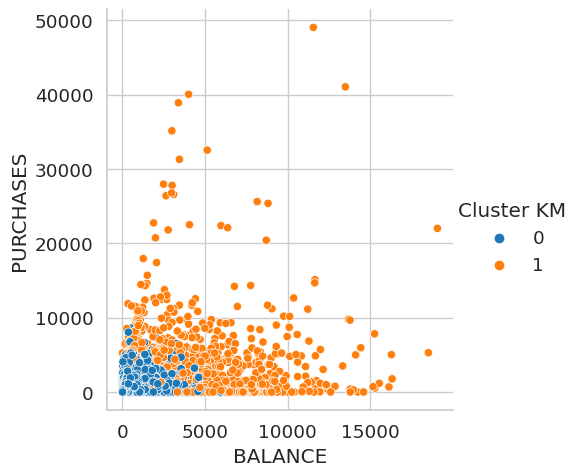

In [ ]:
sns.relplot(x='BALANCE', y='PURCHASES', data=df, hue='Cluster KM', palette='tab10')

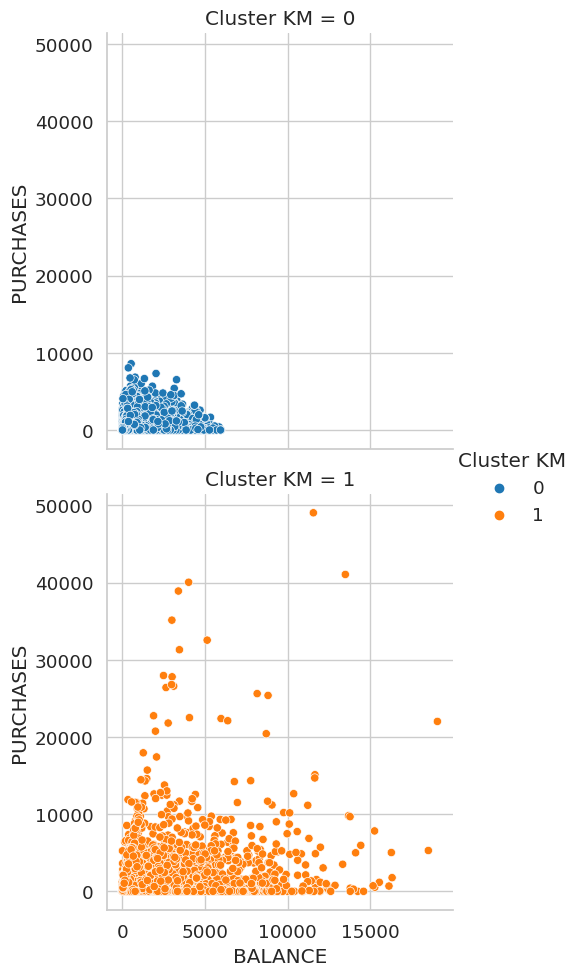

In [ ]:
sns.relplot(x='BALANCE', y='PURCHASES', data=df, hue='Cluster KM', palette='tab10', row='Cluster KM')

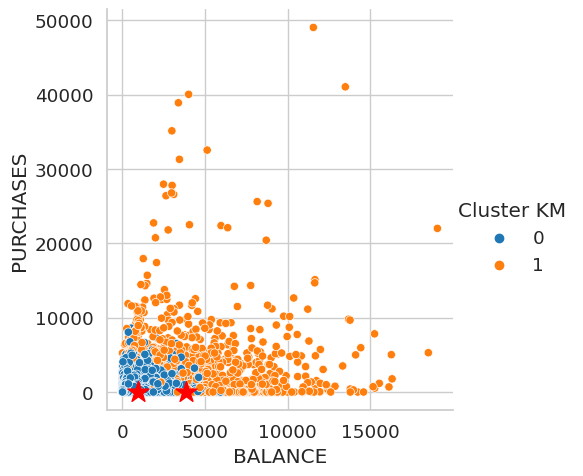

In [ ]:
sns.relplot(x='BALANCE', y='PURCHASES', data=df, hue='Cluster KM', palette='tab10')
plt.scatter(modelKM.cluster_centers_[:, 0], modelKM.cluster_centers_[:, 1],
            color='red', marker='*', s=250)
plt.show()

##AgglomerativeClustering

AgglomerativeClustering adalah salah satu algoritma pengelompokan (clustering) dalam machine learning yang mengadopsi pendekatan pengelompokan hierarkis. Algoritma ini dimulai dengan setiap titik data sebagai kluster terpisah, kemudian secara iteratif menggabungkan kluster yang paling dekat berdasarkan jarak antara mereka. Proses ini berlanjut hingga seluruh titik data tergabung dalam satu kluster atau mencapai kriteria penghentian tertentu. AgglomerativeClustering menggunakan metrik jarak, seperti jarak Euclidean atau jarak Manhattan, untuk mengukur kedekatan antara titik-titik data. Hasilnya adalah pohon penggabungan (dendrogram) yang menggambarkan hubungan hierarkis antara kluster-kulster yang terbentuk.

In [ ]:
modelAC = AgglomerativeClustering(n_clusters=2)
modelAC.fit(df)
df['Cluster AC'] = modelAC.fit_predict(df)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster KM,Cluster AC
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0,1


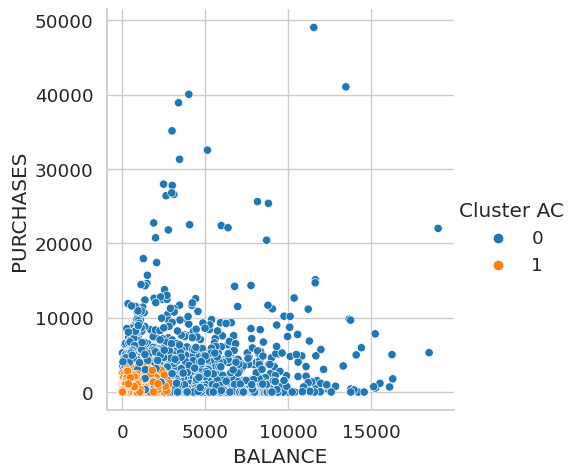

In [ ]:
sns.relplot(x='BALANCE', y='PURCHASES', data=df, hue='Cluster AC', palette='tab10')

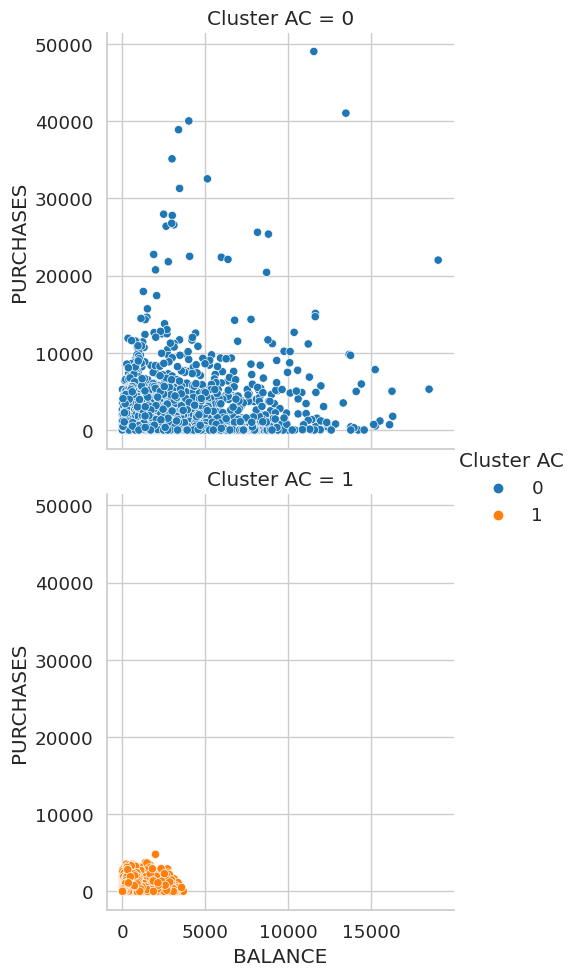

In [ ]:
sns.relplot(x='BALANCE', y='PURCHASES', data=df, hue='Cluster AC', palette='tab10', row='Cluster AC')

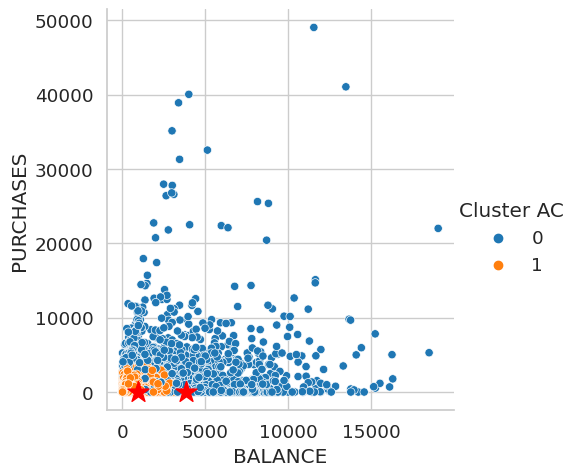

In [ ]:
sns.relplot(x='BALANCE', y='PURCHASES', data=df, hue='Cluster AC', palette='tab10')
plt.scatter(modelKM.cluster_centers_[:, 0], modelKM.cluster_centers_[:, 1],
            color='red', marker='*', s=250)
plt.show()

##BisectingKMeans

Bisecting K-means adalah variasi dari algoritma pengelompokan K-means tradisional. Ini adalah algoritma pengelompokan iteratif yang bertujuan untuk membagi dataset menjadi K kelompok. Namun, tidak seperti K-means biasa yang memulai dengan satu kelompok dan membaginya secara iteratif, Bisecting K-means memulai dengan keseluruhan dataset sebagai satu kelompok dan secara rekursif membaginya menjadi kelompok-kelompok yang lebih kecil.

In [ ]:
modelBK = BisectingKMeans(n_clusters=2, random_state=42)
modelBK.fit(df)
df['Cluster BK'] = modelBK.predict(df)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster KM,Cluster AC,Cluster BK
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,1,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,0,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0,0,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0,1,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0,1,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0,1,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0,1,1


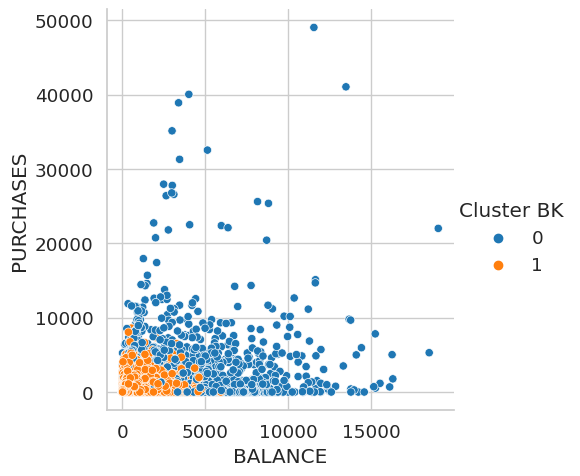

In [ ]:
sns.relplot(x='BALANCE', y='PURCHASES', data=df, hue='Cluster BK', palette='tab10')

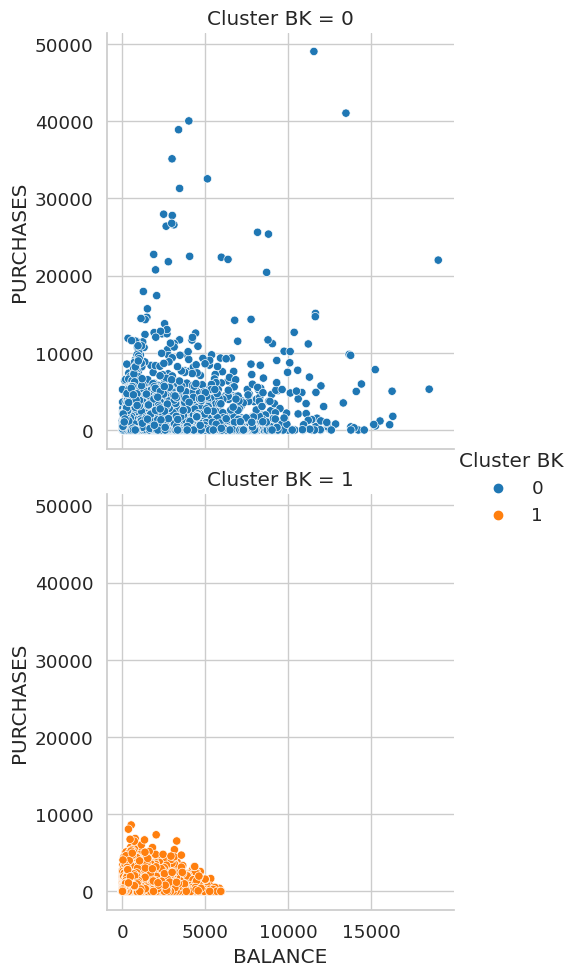

In [ ]:
sns.relplot(x='BALANCE', y='PURCHASES', data=df, hue='Cluster BK', palette='tab10', row='Cluster BK')

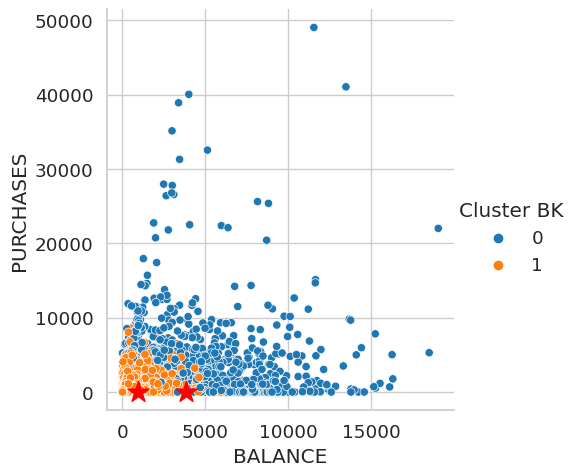

In [ ]:
sns.relplot(x='BALANCE', y='PURCHASES', data=df, hue='Cluster BK', palette='tab10')
plt.scatter(modelKM.cluster_centers_[:, 0], modelKM.cluster_centers_[:, 1],
            color='red', marker='*', s=250)
plt.show()

#Model Selection

In [ ]:
siluet_km = silhouette_score(df.iloc[:, :-1], df['Cluster KM'])
siluet_ac = silhouette_score(df.iloc[:, :-1], df['Cluster AC'])
siluet_bk = silhouette_score(df.iloc[:, :-1], df['Cluster BK'])

calinski_km = calinski_harabasz_score(df.iloc[:, :-1], df['Cluster KM'])
calinski_ac = calinski_harabasz_score(df.iloc[:, :-1], df['Cluster AC'])
calinski_bk = calinski_harabasz_score(df.iloc[:, :-1], df['Cluster AC'])

dbi_km = davies_bouldin_score(df.iloc[:, :-1], df['Cluster KM'])
dbi_ac = davies_bouldin_score(df.iloc[:, :-1], df['Cluster AC'])
dbi_bk = davies_bouldin_score(df.iloc[:, :-1], df['Cluster AC'])

model_selection=pd.DataFrame({'K Means':[siluet_km, calinski_km, dbi_km],
                              'Agglomerative': [siluet_ac, calinski_ac, dbi_ac],
                              'BisectingKMeans': [siluet_bk, calinski_bk, dbi_bk]},
                              index=['Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin'])

In [ ]:
model_selection

,K Means,Agglomerative,BisectingKMeans
Silhouette Score,0.511639,0.383740,0.511710
Calinski-Harabasz,3644.751985,2976.523689,2976.523689
Davies-Bouldin,1.242451,1.273521,1.273521


- Silhouette Score: Silhouette score mengukur sejauh mana setiap sampel dalam klaster berada dekat dengan sampel dalam klaster yang sama dibandingkan dengan klaster lainnya. Rentang nilai siluet adalah dari -1 hingga 1. Semakin tinggi nilai siluet mendekati 1, semakin baik pengelompokan tersebut. Dalam kasus ini, K Means memiliki skor siluet sebesar 0.511639, Agglomerative memiliki skor siluet sebesar 0.383740, dan BisectingKMeans memiliki skor siluet sebesar 0.511710. Berdasarkan skor siluet, baik K Means maupun BisectingKMeans memiliki kualitas pengelompokan yang baik, sedangkan Agglomerative memiliki kualitas yang sedikit lebih rendah.

- Calinski-Harabasz: Indeks Calinski-Harabasz adalah metrik yang mengukur kepadatan dalam klaster dan seberapa terpisah klaster tersebut. Semakin tinggi nilai Calinski-Harabasz, semakin baik kualitas pengelompokan. Dalam kasus ini, K Means memiliki nilai Calinski-Harabasz sebesar 3644.751985, Agglomerative memiliki nilai Calinski-Harabasz sebesar 2976.523689, dan BisectingKMeans juga memiliki nilai Calinski-Harabasz sebesar 2976.523689. Berdasarkan nilai Calinski-Harabasz, K Means memiliki kualitas pengelompokan yang lebih baik dibandingkan Agglomerative dan BisectingKMeans.

- Davies-Bouldin: Indeks Davies-Bouldin mengukur seberapa baik klaster terpisah satu sama lain. Semakin rendah nilai Davies-Bouldin, semakin baik kualitas pengelompokan. Dalam kasus ini, K Means memiliki nilai Davies-Bouldin sebesar 1.242451, Agglomerative memiliki nilai Davies-Bouldin sebesar 1.273521, dan BisectingKMeans juga memiliki nilai Davies-Bouldin sebesar 1.273521. Berdasarkan nilai Davies-Bouldin, K Means memiliki kualitas pengelompokan yang sedikit lebih baik dibandingkan Agglomerative dan BisectingKMeans.

Secara keseluruhan, berdasarkan metrik evaluasi yang diberikan, K Means memiliki kualitas pengelompokan yang baik berdasarkan Silhouette Score, Calinski-Harabasz, dan Davies-Bouldin. BisectingKMeans juga memiliki kualitas pengelompokan yang baik berdasarkan Silhouette Score dan Calinski-Harabasz. Sedangkan Agglomerative memiliki kualitas pengelompokan yang sedikit lebih rendah dibandingkan dengan K Means dan BisectingKMeans berdasarkan metrik evaluasi yang diberikan.

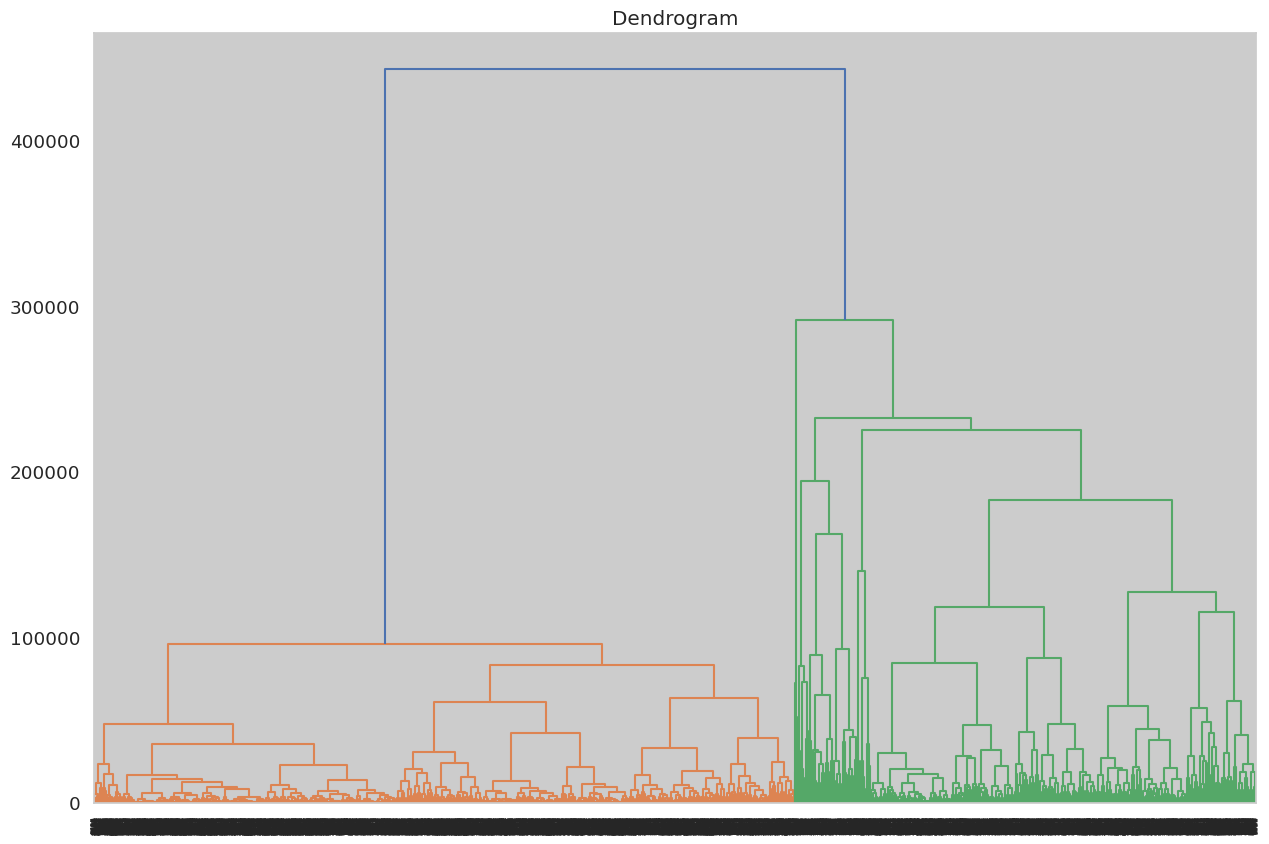

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Dendrogram')
plt.axhline(y=200, linestyle='--')
dend = sch.dendrogram(sch.linkage(df.iloc[:, :-1], method='ward'))

- Dendrogram akan menampilkan hubungan hierarkis antara kelompok data. Garis horizontal yang digambar dengan plt.axhline akan memotong dendrogram pada tingkat ketinggian 200, menunjukkan jumlah klaster yang terbentuk.
- Dendrogram tidak memberikan label atau nama klaster, tetapi digunakan untuk memvisualisasikan hubungan hierarkis dalam data Anda.